In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#modeling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


In [3]:
df  =pd.read_csv('stud.csv')

In [4]:
df.head(4)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44


In [5]:
X=df.drop(columns=['math score'],axis=1)

In [6]:
y=df['math score']

In [7]:
print("catagories in 'gender'variable: ",end=" ")
print(df['gender'].unique())

print("catagories in 'race/ethnicity'variable: ",end=" ")
print(df['race/ethnicity'].unique())

print("catagories in 'parental level of education'variable: ",end=" ")
print(df['parental level of education'].unique())

print("catagories in 'lunch'variable: ",end=" ")
print(df['lunch'].unique())

print("catagories in 'test preparation course'variable: ",end=" ")
print(df['test preparation course'].unique())



catagories in 'gender'variable:  ['female' 'male']
catagories in 'race/ethnicity'variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
catagories in 'parental level of education'variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
catagories in 'lunch'variable:  ['standard' 'free/reduced']
catagories in 'test preparation course'variable:  ['none' 'completed']


In [8]:
#creating colums transformers with three types of transformers
num_features=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose  import ColumnTransformer

numeric_Transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
         ("OneHotEncoder",oh_transformer,cat_features),
          ("StandardScaler",numeric_Transformer,num_features)

    ]
   
)


In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X.shape

(1000, 19)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape


((800, 19), (200, 19))

In [13]:
#creating an evaluation matrix
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [17]:
models ={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-neigbour regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random foreset Regressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoosting Regressor":CatBoostRegressor(verbose=False),
    "AdaBoostRegressor":AdaBoostRegressor(),

}
'''
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model =list(models.values())[i]
    model.fit(X_train,y_train)

    #make prediction
    y_train_pred=model.predict(X_train)
    y_test_pred =model.predict(X_test)

    #evalueating the train and test dataset
    model_train_mae , model_train_rmse , model_train_r2 =  evaluate_model(y_train,y_train_pred)

    model_test_mae , model_test_rmse , model_test_r2 = evaluate_model(y_test,y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

print("model performance for trainig set")
print("root mean squared eror: {:.4f}".format(model_train_rmse))
print("Mean absolute error:  {:.4f}".format(model_train_mae))
print("r2_score:  {:.4f}".format(model_train_r2))

print("//////////////////////////////")


print("model performace for test")
print("root mean squared eror:  {:.4f}".format(model_test_rmse))
print("Mean absolute error: {:.4f}".format(model_test_mae))
print("r2_score:  {:.4f}".format(model_test_r2))
r2_list.append(model_test_r2)

print("="*35)
print('\n')
'''
model_list = []
r2_list = []

for i in range(len(models)):
    model_name = list(models.keys())[i]
    model = list(models.values())[i]

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(
        y_train, y_train_pred
    )
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(
        y_test, y_test_pred
    )

    print(model_name)

    print("Model performance for training set")
    print("RMSE: {:.4f}".format(model_train_rmse))
    print("MAE: {:.4f}".format(model_train_mae))
    print("R2 score: {:.4f}".format(model_train_r2))

    print("-------------------------------")

    print("Model performance for test set")
    print("RMSE: {:.4f}".format(model_test_rmse))
    print("MAE: {:.4f}".format(model_test_mae))
    print("R2 score: {:.4f}".format(model_test_r2))

    print("=" * 35)

    model_list.append(model_name)
    r2_list.append(model_test_r2)

Linear Regression
Model performance for training set
RMSE: 5.3240
MAE: 4.2691
R2 score: 0.8743
-------------------------------
Model performance for test set
RMSE: 5.3773
MAE: 4.2053
R2 score: 0.8812
Lasso
Model performance for training set
RMSE: 6.5938
MAE: 5.2063
R2 score: 0.8071
-------------------------------
Model performance for test set
RMSE: 6.5197
MAE: 5.1579
R2 score: 0.8253
Ridge
Model performance for training set
RMSE: 5.3233
MAE: 4.2650
R2 score: 0.8743
-------------------------------
Model performance for test set
RMSE: 5.3904
MAE: 4.2111
R2 score: 0.8806
K-neigbour regressor
Model performance for training set
RMSE: 5.7133
MAE: 4.5217
R2 score: 0.8552
-------------------------------
Model performance for test set
RMSE: 7.2412
MAE: 5.6110
R2 score: 0.7845
Decision Tree
Model performance for training set
RMSE: 0.2795
MAE: 0.0187
R2 score: 0.9997
-------------------------------
Model performance for test set
RMSE: 7.9145
MAE: 6.3100
R2 score: 0.7426
Random foreset Regressor


In [18]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['model_name','r2_score']).sort_values(by=['r2_score'],ascending=False)

,model_name,r2_score
0,Linear Regression,0.881171
2,Ridge,0.880593
7,CatBoosting Regressor,0.851632
5,Random foreset Regressor,0.850856
8,AdaBoostRegressor,0.849405
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-neigbour regressor,0.784518
4,Decision Tree,0.742581


## Linerar Regression

In [19]:
lin_model= LinearRegression(fit_intercept=True)
lin_model= lin_model.fit(X_train,y_train)
y_pred =lin_model.predict(X_test)
score =r2_score(y_test,y_pred)*100
print("Acurracy of the model is: %.2f" %score)

Acurracy of the model is: 88.12


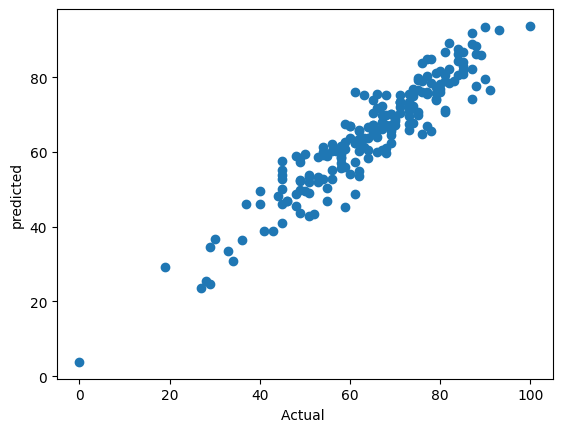

In [20]:
plt.scatter(y_test,y_pred);
plt.xlabel("Actual ");
plt.ylabel("predicted");


<Axes: xlabel='math score'>

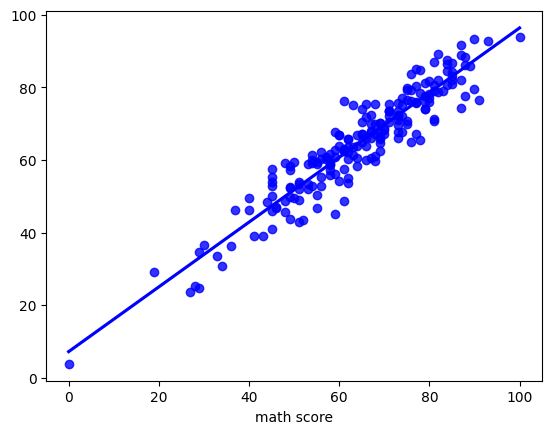

In [23]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='blue')

### Difference between actual vs predicted values

In [25]:
pred_df=pd.DataFrame({'actual value':y_test,'predicted value':y_pred,'Difference':y_test-y_pred})
pred_df

,actual value,predicted value,Difference
521,91,76.507812,14.492188
737,53,58.796875,-5.796875
740,80,76.976562,3.023438
660,74,76.984375,-2.984375
411,84,87.664062,-3.664062
...,...,...,...
408,52,43.367188,8.632812
332,62,62.156250,-0.156250
208,74,67.812500,6.187500
613,65,67.125000,-2.125000
